<a href="https://colab.research.google.com/github/Jencyshah1211/Microsoft-engage-2022/blob/main/microsoft_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading our dataset in cars dataframe
cars = pd.read_csv('cars_engage_2022.csv')

In [ ]:
# Getting top 5 rows of our dataset
cars.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Getting last 5 rows of our dataset
cars.tail()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1275,1275,Mitsubishi,Montero,3.2 At,"Rs. 68,62,560",3200 cc,4.0,4.0,AWD (All Wheel Drive),In-line,...,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Getting the shape of our dataset
cars.shape

(1276, 141)

In [ ]:
cars.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


# **Cleaning the dataset**

In [ ]:
#Checking the null values
cars.isnull()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,True,True,True,True,True
1272,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,True,True,True
1273,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,True,True,True
1274,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,True


In [ ]:
# It will give us the total number of null values present in particular column
cars.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


In [ ]:
# Dropping all the null values of make column 
cars.dropna(how='all', subset=['Make'],inplace=True)

In [ ]:
cars.shape

(1201, 141)

In [ ]:
#Dropping all the columns which are not useful by using iloc[] method
car1 =  cars.drop(cars.iloc[:,49:], axis=1)

In [ ]:
car1

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Automatic,2230 mm
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,100PS@3600rpm,200Nm@1750rpm,Digital,Analog,Analog,2,5.0,Leather,Manual,2600 mm
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,100PS@3600rpm,200Nm@1750rpm,Digital,Analog,Analog,2,5.0,Leather,Manual,2600 mm
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,119PS@6600rpm,145Nm@4600rpm,Digital,Analog,Analog,2,5.0,Leather,Automatic,2600 mm
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,119PS@6600rpm,145Nm@4600rpm,Digital,Analog,Analog,2,5.0,Fabric,Automatic,2600 mm


In [ ]:
car = car1.drop(car1.iloc[:,26:45], axis=1)


In [ ]:
car

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Seating_Capacity,Seats_Material,Type,Wheelbase
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,4.0,Fabric,Manual,2230 mm
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,4.0,Fabric,Manual,2230 mm
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,36 km/kg,710 kg,4,4.0,Fabric,Manual,2230 mm
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,?23.6 km/litre,NaN,21.9 km/litre,NaN,725 kg,5,4.0,Fabric,Automatic,2230 mm
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,4.0,Fabric,Manual,2230 mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,22.6 km/litre,25.1 km/litre,25.1 km/litre,NaN,1170 kg,6,5.0,Leather,Manual,2600 mm
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,22.6 km/litre,25.1 km/litre,25.1 km/litre,NaN,1175 kg,6,5.0,Leather,Manual,2600 mm
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,18 km/litre,18 km/litre,22.6 km/litre,NaN,1107 kg,5,5.0,Leather,Automatic,2600 mm
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,14.3 km/litre,16.4 km/litre,17.8 km/litre,NaN,1080 kg,5,5.0,Fabric,Automatic,2600 mm


In [ ]:
# Removing the unnamed column 
car.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
# Creating a backup copy in case we lost our old one
backup=car.copy()

In [ ]:
car.shape

(1201, 29)

In [ ]:
car.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Seating_Capacity,Seats_Material,Type,Wheelbase
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,4.0,Fabric,Manual,2230 mm
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,4.0,Fabric,Manual,2230 mm
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,36 km/kg,710 kg,4,4.0,Fabric,Manual,2230 mm
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,?23.6 km/litre,NaN,21.9 km/litre,NaN,725 kg,5,4.0,Fabric,Automatic,2230 mm
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,4.0,Fabric,Manual,2230 mm


In [ ]:
#Collecting the number of null values of our model, variant and ex-showroom_price column
car['Model'].isnull().sum()
car['Variant'].isnull().sum()
car['Ex-Showroom_Price'].isnull().sum()


0

In [ ]:
# We see that variant column has large number of values so we will just keep the first two words of the value.
car['Variant']=car['Variant'].str.split(' ').str.slice(0,2).str.join(' ')

In [ ]:
# Here we have dtype as object and we have commas present so we will remove it .
car['Ex-Showroom_Price'].unique

<bound method Series.unique of 0        Rs. 2,92,667
1        Rs. 2,36,447
2        Rs. 2,96,661
3        Rs. 3,34,768
4        Rs. 2,72,223
            ...      
1271    Rs. 13,02,000
1272    Rs. 14,21,000
1273    Rs. 14,31,000
1274    Rs. 12,01,000
1275    Rs. 68,62,560
Name: Ex-Showroom_Price, Length: 1201, dtype: object>

In [ ]:
# We will remove rs. from values
car['Ex-Showroom_Price']=car['Ex-Showroom_Price'].str.replace('Rs.','')

In [ ]:
# We will remove ',' from the values and give it datatype as integer.
car['Ex-Showroom_Price']=car['Ex-Showroom_Price'].str.replace(',','').astype(int)

In [ ]:
# Displacement column has cc joined with values so we will remove it first
car['Displacement']=car['Displacement'].str.split(' ').str.get(0).str.replace("' '","")


In [ ]:
# Removing all the rows where Displacement is null
car=car[~car['Displacement'].isna()]

In [ ]:
# Here also we will only keep the numerical part of values 
car['Fuel_Tank_Capacity']=car['Fuel_Tank_Capacity'].str.split(' ').str.get(0).str.replace("' '","")

In [ ]:
# Removing all the rows where Fuel_Tank_Capacity is null
car=car[~car['Fuel_Tank_Capacity'].isna()]

In [ ]:
# We will keep the numerical part only and will change it's datatype to float
car['Height']=car['Height'].str.split(' ').str.get(0).str.replace("' '","").astype(float)

In [ ]:
# We will keep the numerical part only and will change it's datatype to float
car['Length']=car['Length'].str.split(' ').str.get(0).str.replace("' '","").astype(float)

In [ ]:
# We will keep the numerical part only and will change it's datatype to float
car['Width']=car['Width'].str.split(' ').str.get(0).str.replace("' '","").astype(float)

In [ ]:
# We will keep the numerical part only 
car['City_Mileage']=car['City_Mileage'].str.split(' ').str.get(0)

In [ ]:
# We will keep the numerical part only and will change it's datatype to float
car['Highway_Mileage']=car['Highway_Mileage'].str.split(' ').str.get(0)

In [ ]:
# We will keep the numerical part only and will change it's datatype to float
car['ARAI_Certified_Mileage']=car['ARAI_Certified_Mileage'].str.split(' ').str.get(0)

In [ ]:
# We will keep the numerical part only and will change it's datatype to float
car['ARAI_Certified_Mileage_for_CNG']=car['ARAI_Certified_Mileage_for_CNG'].str.split(' ').str.get(0)

In [ ]:
# We will keep the numerical part only and will change it's datatype to float
car['Kerb_Weight']=car['Kerb_Weight'].str.split(' ').str.get(0)

In [ ]:
# For changing the datatype to float we have to use the to_numeric function
car['Kerb_Weight'] = pd.to_numeric(car['Kerb_Weight'], errors='coerce')

In [ ]:
# we have change it's datatype to float
car['Kerb_Weight'].astype(float)

0        660.0
1        725.0
2        710.0
3        725.0
4        725.0
         ...  
1271    1170.0
1272    1175.0
1273    1107.0
1274    1080.0
1275    2335.0
Name: Kerb_Weight, Length: 1131, dtype: float64

In [ ]:
# We will keep the numerical part only and will change it's datatype to float
car['Wheelbase']=car['Wheelbase'].str.split(' ').str.get(0).astype(float)

In [ ]:
# Counting the total number of null values  
car['Cylinders'].isnull().sum()

49

In [ ]:
# Filling the null values by the mean of the column
car['Cylinders'] = car['Cylinders'].fillna(car['Cylinders'].mean())

In [ ]:
# Counting the total number of null values
car['Valves_Per_Cylinder'].isnull().sum()

84

In [ ]:
# Filling the null values by the mean of the column
car['Valves_Per_Cylinder'] = car['Valves_Per_Cylinder'].fillna(car['Valves_Per_Cylinder'].mean())

In [ ]:
# Counting the total number of null values
car['Drivetrain'].isnull().sum()

4

In [ ]:
car['Drivetrain'].astype(object)

0        RWD (Rear Wheel Drive)
1        RWD (Rear Wheel Drive)
2        RWD (Rear Wheel Drive)
3        RWD (Rear Wheel Drive)
4        RWD (Rear Wheel Drive)
                 ...           
1271    FWD (Front Wheel Drive)
1272    FWD (Front Wheel Drive)
1273    FWD (Front Wheel Drive)
1274    FWD (Front Wheel Drive)
1275      AWD (All Wheel Drive)
Name: Drivetrain, Length: 1131, dtype: object

In [ ]:
# Finding the mode of the column
mode_of_drivetrain=car['Drivetrain'].mode()[0]

In [ ]:
# Filling the null values by the mode of the column
car['Drivetrain'].fillna(mode_of_drivetrain,inplace=True)

In [ ]:
# Finding the mode of the column
mode_cyl_con=car['Cylinder_Configuration'].mode()[0]

In [ ]:
# Filling the null values by the mean of the column
car['Cylinder_Configuration'].fillna(mode_cyl_con,inplace=True)

In [ ]:
# Counting the total number of null values
car['Emission_Norm'].isnull().sum()

4

In [ ]:
# Finding the mode of the column
mode_emi_nor=car['Emission_Norm'].mode()[0]

In [ ]:
# Filling the null values by the mode of the column
car['Emission_Norm'].fillna(mode_emi_nor,inplace=True)

In [ ]:
# We are converting roman numbers to Integers
car['Emission_Norm']=car['Emission_Norm'].str.replace('BS VI','BS 6')

In [ ]:
# We are converting roman numbers to Integers
car['Emission_Norm']=car['Emission_Norm'].str.replace('BS III','BS 3')

In [ ]:
# We are converting roman numbers to Integers
car['Emission_Norm']=car['Emission_Norm'].str.replace('BS IV','BS 4')

In [ ]:
# Counting the total number of null values
car['Engine_Location'].isnull().sum()

34

In [ ]:
# Filling the null values by the mode of the column
mode_eng_loc=car['Engine_Location'].mode()[0]
car['Engine_Location'].fillna(mode_eng_loc,inplace=True)

In [ ]:
# Counting the total number of null values
car['Fuel_System'].isnull().sum()

1

In [ ]:
# Filling the null values by the mode of the column
mode_fuel_sys=car['Fuel_System'].mode()[0]
car['Fuel_System'].fillna(mode_fuel_sys,inplace=True)

In [ ]:
# Counting the total number of null values
car['Fuel_Tank_Capacity'].isnull().sum()

0

In [ ]:
# Counting the total number of null values
car['Fuel_Type'].isnull().sum()

0

In [ ]:
# Counting the total number of null values
car['Height'].isnull().sum()

1

In [ ]:
# Filling the null values by the mean of the column
car['Height'] = car['Height'].fillna(car['Height'].mean())

In [ ]:
# Counting the total number of null values
car['Length'].isnull().sum()

0

In [ ]:
# Counting the total number of null values
car['Width'].isnull().sum()

12

In [ ]:
# Filling the null values by the mean of the column
car['Width'] = car['Width'].fillna(car['Width'].mean())

In [ ]:
# Counting the total number of null values
car['Body_Type'].isnull().sum()

6

In [ ]:
# Filling the null values by the mode of the column
mode_body=car['Body_Type'].mode()[0]
car['Body_Type'].fillna(mode_body,inplace=True)

In [ ]:
# Counting the total number of null values
car['Doors'].isnull().sum()

4

In [ ]:
# Filling the null values by the mean of the column
car['Doors'] = car['Doors'].fillna(car['Doors'].mean())

In [ ]:
# Filling the null values by the mean of the column
car['Kerb_Weight'] = car['Kerb_Weight'].fillna(car['Kerb_Weight'].mean())

In [ ]:
car.shape

(1131, 29)

In [ ]:
car['City_Mileage']

0       ?23.6
1       ?23.6
2         NaN
3       ?23.6
4       ?23.6
        ...  
1271     22.6
1272     22.6
1273       18
1274     14.3
1275     8.25
Name: City_Mileage, Length: 1131, dtype: object

In [ ]:
# Now we see that the column here contains special characters so we will remove it
car['City_Mileage']=car['City_Mileage'].str.replace("['?',' ']","")

In [ ]:
# see we have removed all the special characters
car['City_Mileage']

0       23.6
1       23.6
2        NaN
3       23.6
4       23.6
        ... 
1271    22.6
1272    22.6
1273      18
1274    14.3
1275    8.25
Name: City_Mileage, Length: 1131, dtype: object

In [ ]:
# For changing the datatype to float we have to use the to_numeric function
car['City_Mileage'] = pd.to_numeric(car['City_Mileage'], errors='coerce')

In [ ]:
# we have change it's datatype to float
car['City_Mileage'].astype(float)

0       23.60
1       23.60
2         NaN
3       23.60
4       23.60
        ...  
1271    22.60
1272    22.60
1273    18.00
1274    14.30
1275     8.25
Name: City_Mileage, Length: 1131, dtype: float64

In [ ]:
# Filling the null values by the mean of the column
car['City_Mileage'] = car['City_Mileage'].fillna(car['City_Mileage'].mean())

In [ ]:
# We will reomve the spaces from the column
car['Highway_Mileage']=car['Highway_Mileage'].str.replace("' '","")

In [ ]:
# For changing the datatype to float we have to use the to_numeric function
car['Highway_Mileage'] = pd.to_numeric(car['Highway_Mileage'], errors='coerce')

In [ ]:
# we have change it's datatype to float
car['Highway_Mileage'].astype(float)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1271    25.10
1272    25.10
1273    18.00
1274    16.40
1275    11.56
Name: Highway_Mileage, Length: 1131, dtype: float64

In [ ]:
# For changing the datatype to float we have to use the to_numeric function
car['ARAI_Certified_Mileage'] = pd.to_numeric(car['ARAI_Certified_Mileage'], errors='coerce')

In [ ]:
# we have change it's datatype to float
car['ARAI_Certified_Mileage'].astype(float)

0       23.60
1       23.60
2         NaN
3       21.90
4       23.60
        ...  
1271    25.10
1272    25.10
1273    22.60
1274    17.80
1275    11.56
Name: ARAI_Certified_Mileage, Length: 1131, dtype: float64

In [ ]:
# Filling the null values by the mean of the column
car['ARAI_Certified_Mileage'] = car['ARAI_Certified_Mileage'].fillna(car['ARAI_Certified_Mileage'].mean())

In [ ]:
# Filling the null values by the mean of the column
car['Highway_Mileage'] = car['Highway_Mileage'].fillna(car['Highway_Mileage'].mean())

In [ ]:
# For changing the datatype to float we have to use the to_numeric function
car['ARAI_Certified_Mileage_for_CNG'] = pd.to_numeric(car['ARAI_Certified_Mileage_for_CNG'], errors='coerce')

In [ ]:
# we have change it's datatype to float
car['ARAI_Certified_Mileage_for_CNG'].astype(float)

0        NaN
1        NaN
2       36.0
3        NaN
4        NaN
        ... 
1271     NaN
1272     NaN
1273     NaN
1274     NaN
1275     NaN
Name: ARAI_Certified_Mileage_for_CNG, Length: 1131, dtype: float64

In [ ]:
# Filling the null values by the mean of the column
car['ARAI_Certified_Mileage_for_CNG'] = car['ARAI_Certified_Mileage_for_CNG'].fillna(car['ARAI_Certified_Mileage_for_CNG'].mean())

In [ ]:
# Filling the null values by the mode of the column
mode_gears=car['Gears'].mode()[0]
car['Gears'].fillna(mode_gears,inplace=True)

In [ ]:
# Filling the null values by the mean of the column
car['Seating_Capacity'] = car['Seating_Capacity'].fillna(car['Seating_Capacity'].mean())

In [ ]:
# Filling the null values by the mode of the column
mode_seat_mat=car['Seats_Material'].mode()[0]
car['Seats_Material'].fillna(mode_seat_mat,inplace=True)

In [ ]:
# Filling the null values by the mean of the column
car['Wheelbase'] = car['Wheelbase'].fillna(car['Wheelbase'].mean())

In [ ]:
car=car.reset_index(drop=True)

In [ ]:
# Checking the number of null values
car.isnull().sum()

Make                              0
Model                             0
Variant                           0
Ex-Showroom_Price                 0
Displacement                      0
Cylinders                         0
Valves_Per_Cylinder               0
Drivetrain                        0
Cylinder_Configuration            0
Emission_Norm                     0
Engine_Location                   0
Fuel_System                       0
Fuel_Tank_Capacity                0
Fuel_Type                         0
Height                            0
Length                            0
Width                             0
Body_Type                         0
Doors                             0
City_Mileage                      0
Highway_Mileage                   0
ARAI_Certified_Mileage            0
ARAI_Certified_Mileage_for_CNG    0
Kerb_Weight                       0
Gears                             0
Seating_Capacity                  0
Seats_Material                    0
Type                        

In [ ]:
car.to_csv('Cleaned_car1.csv')

We have completed our data cleaning part. We have filled all the null values, changed datatype to int or float, removed special characters,unnamed column and so on for cleaning. We have stored our cleaned data in cleaned_car csv file.

# **Basic Analysis**

In [ ]:
car['Make'].value_counts()

Maruti Suzuki       149
Hyundai             125
Mahindra            113
Tata                 92
Toyota               82
Honda                64
Ford                 43
Skoda                43
Renault              36
Volkswagen           34
Bmw                  34
Audi                 30
Nissan               29
Jeep                 28
Fiat                 21
Jaguar               21
Kia                  16
Datsun               15
Volvo                15
Land Rover Rover     14
Porsche              14
Maruti Suzuki R      14
Lamborghini          12
Icml                 11
Land Rover           10
Lexus                 9
Maserati              9
Mini                  9
Ferrari               8
Mitsubishi            7
Bentley               6
Force                 6
Premier               6
Aston Martin          3
Isuzu                 2
Dc                    1
Name: Make, dtype: int64

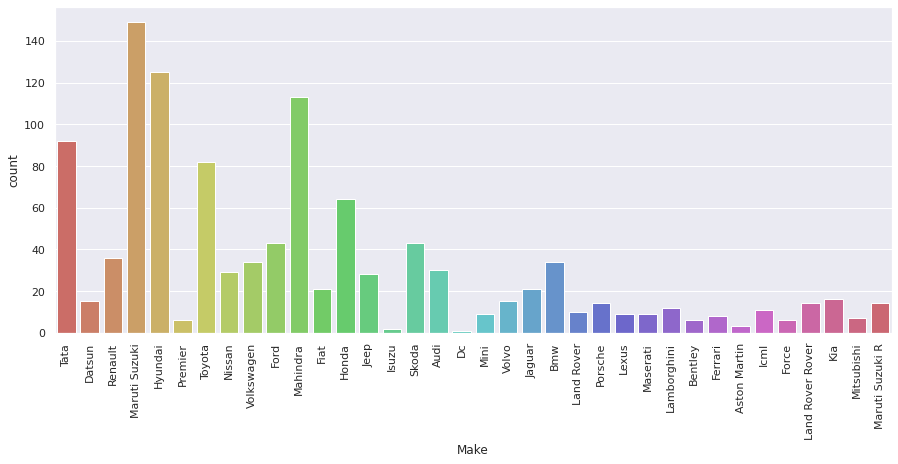

In [ ]:
# It will give a graph of company which make more cars and it shows that Maruti suzuki has made a large number of cars
plt.figure(figsize=(15,6))
sns.countplot('Make',data=car, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
car['Fuel_Type'].value_counts()

Petrol          577
Diesel          522
CNG              15
Hybrid           11
CNG + Petrol      6
Name: Fuel_Type, dtype: int64

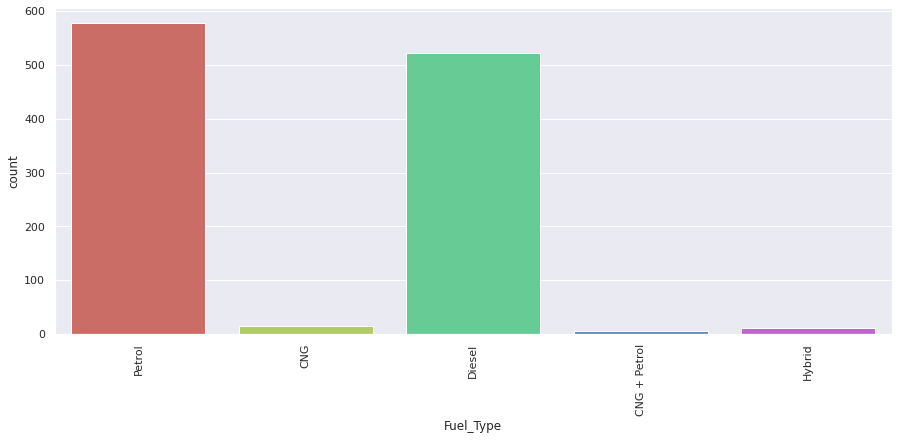

In [ ]:
# It will give a graph of fuel type used by cars and it shows that petrol is used by major number of cars followed by diesel
plt.figure(figsize=(15,6))
sns.countplot('Fuel_Type',data=car, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
car['Engine_Location'].value_counts()

Front, Transverse       781
Front, Longitudinal     329
Rear, Transverse         15
Rear Mid, Transverse      3
Mid, Longitudinal         2
Rear, Longitudinal        1
Name: Engine_Location, dtype: int64

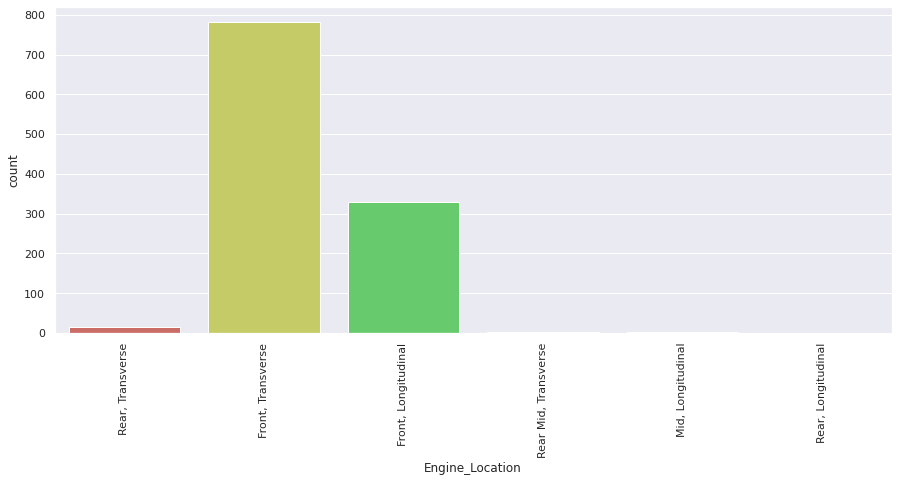

In [ ]:
# It will give a graph of engine location of cars and it shows that most cars have engines located in front
plt.figure(figsize=(15,6))
sns.countplot('Engine_Location',data=car, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
car['Drivetrain'].value_counts()

FWD (Front Wheel Drive)    837
RWD (Rear Wheel Drive)     130
AWD (All Wheel Drive)      120
4WD                         44
Name: Drivetrain, dtype: int64

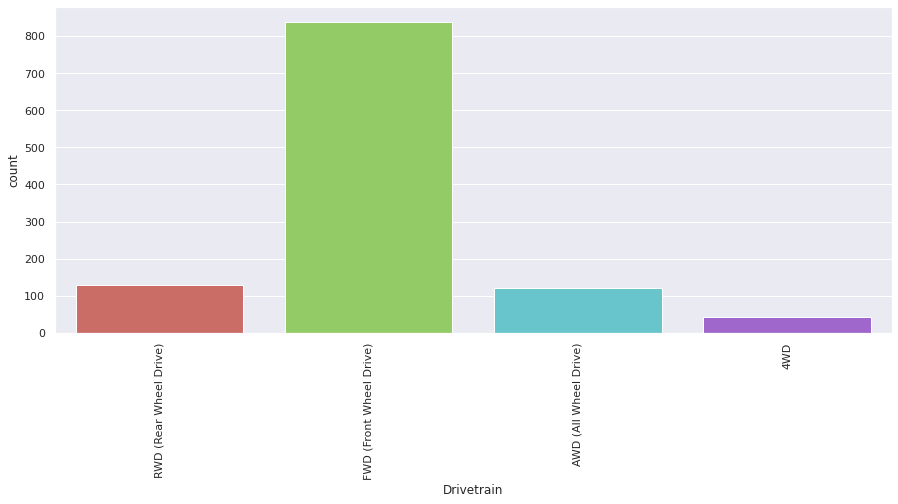

In [ ]:
# It will give a graph of Drivetrain cars and it shows that front wheel drive is used by major number of cars.
plt.figure(figsize=(15,6))
sns.countplot('Drivetrain',data=car, palette='hls')
plt.xticks(rotation = 90)
plt.show()

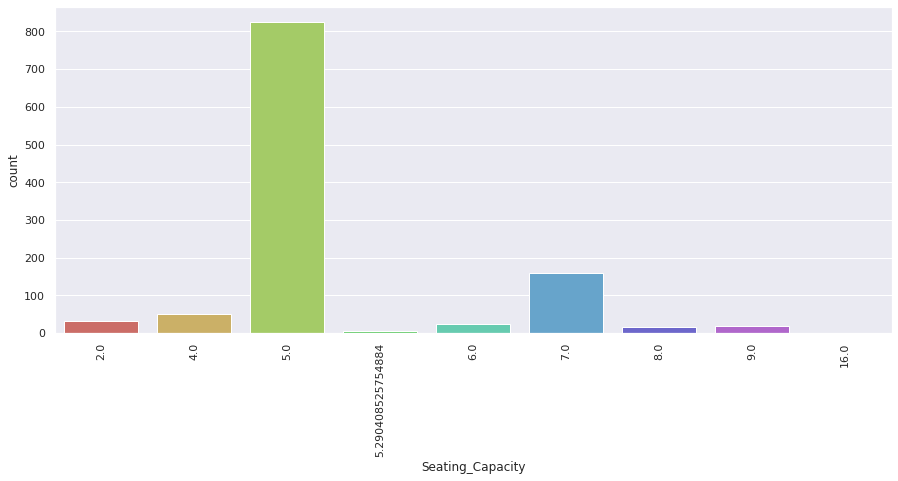

In [ ]:
# It will give a graph of sitting capacity of cars and it shows that most cars are 5 sitter.
plt.figure(figsize=(15,6))
sns.countplot('Seating_Capacity',data=car, palette='hls')
plt.xticks(rotation = 90)
plt.show()


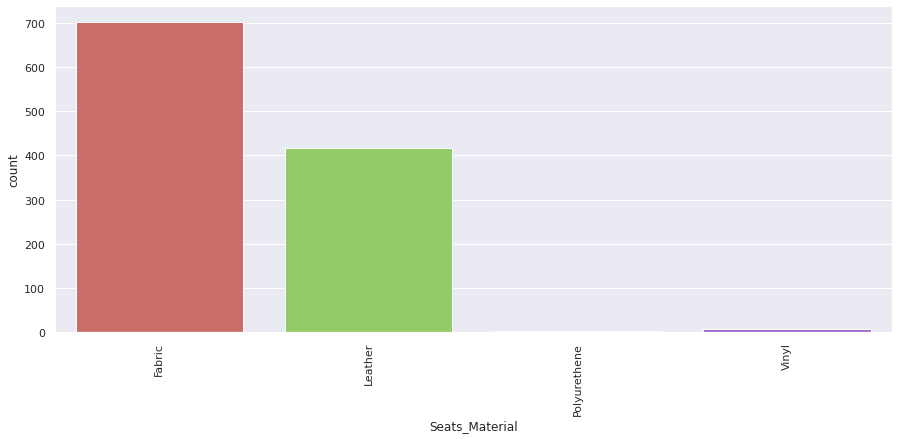

In [ ]:
# It will give a graph of material used in cars and it shows that fabric is used by major number of cars followed by leather.
plt.figure(figsize=(15,6))
sns.countplot('Seats_Material',data=car, palette='hls')
plt.xticks(rotation = 90)
plt.show()

<Figure size 720x576 with 0 Axes>

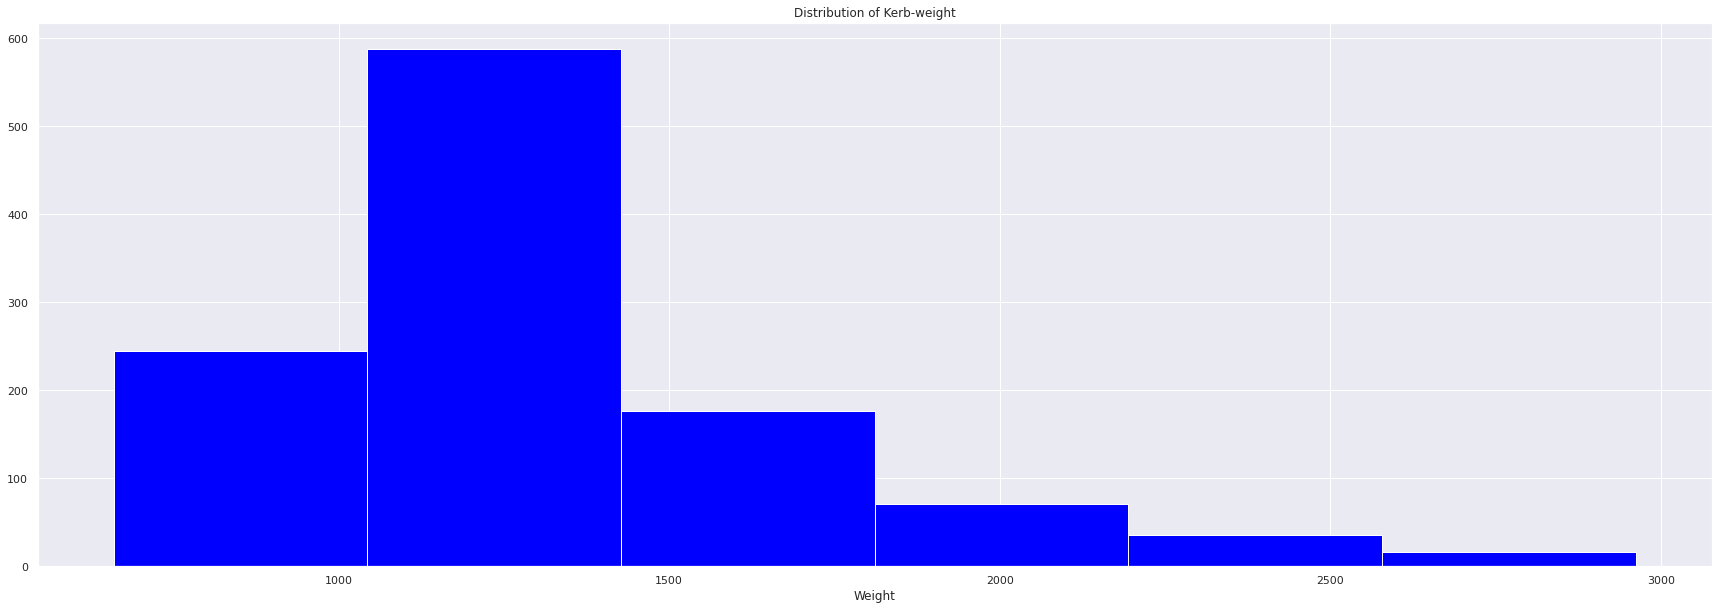

In [ ]:
# Histogram of kerb weight shows that most of the cars has kerb weight in range of 500 to 1700
plt.figure(figsize=(10,8))
car[['Kerb_Weight']].hist(bins=6,color="Blue")
plt.title("Distribution of Kerb-weight")
plt.xlabel("Weight")
plt.show()

<Figure size 720x576 with 0 Axes>

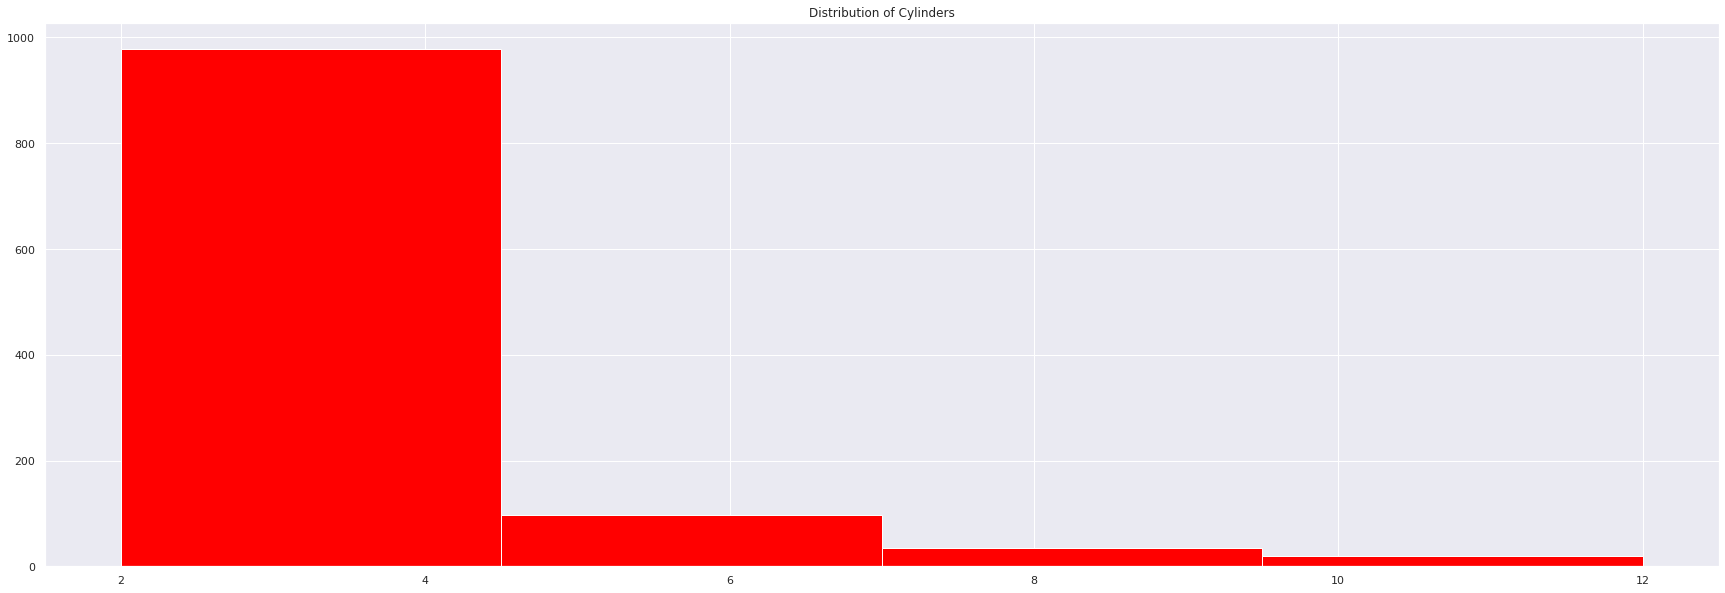

In [ ]:
# Histogram of cylinders shows that most of the cars has cylinders between 2 to 4
plt.figure(figsize=(10,8))
car[['Cylinders']].hist(bins=4,color="red")
plt.title("Distribution of Cylinders")
plt.show()

<Figure size 576x576 with 0 Axes>

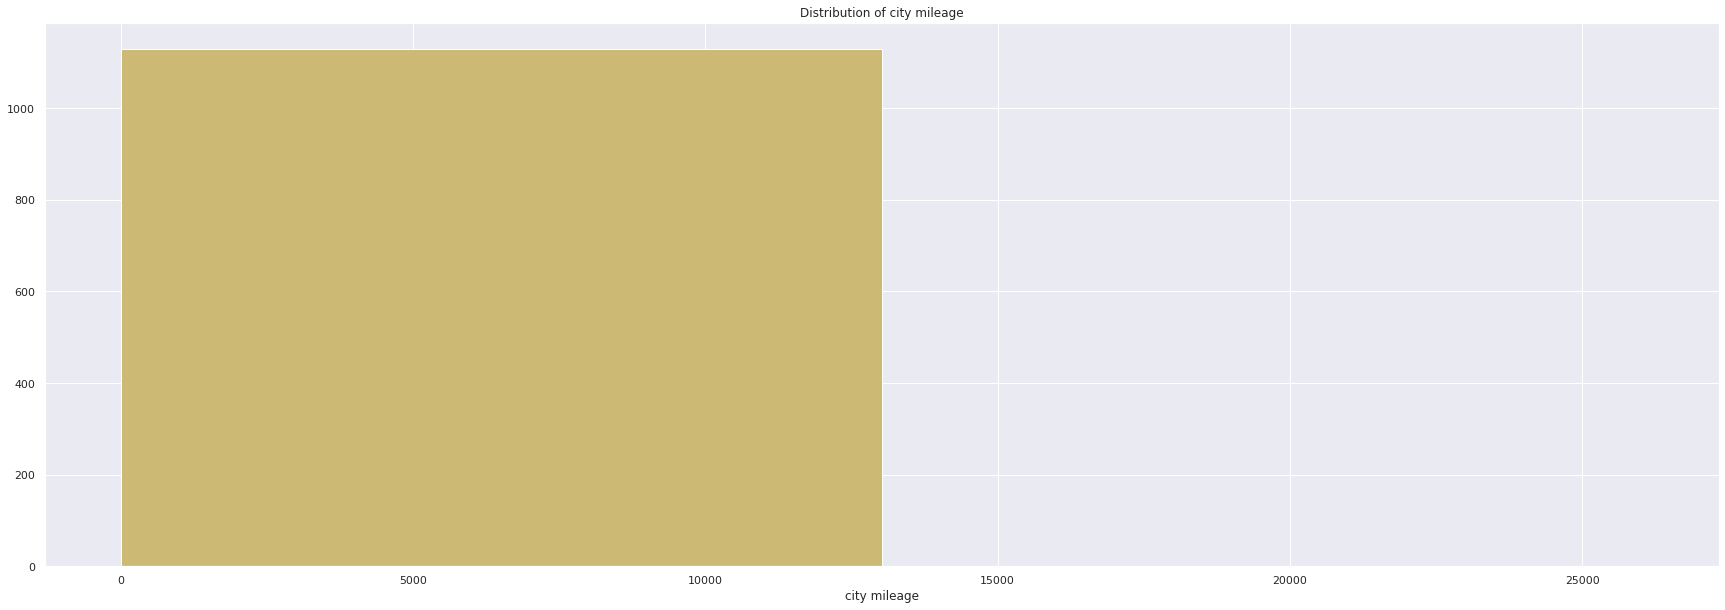

In [ ]:
# Histogram of city mileage shows that most of the cars has city mileage in range of 0 to 12000
plt.figure(figsize=(8,8))
car[['City_Mileage']].hist(bins=2,color="Y")
plt.title("Distribution of city mileage")
plt.xlabel("city mileage")
plt.show()

Text(0.5, 0, 'Doors')

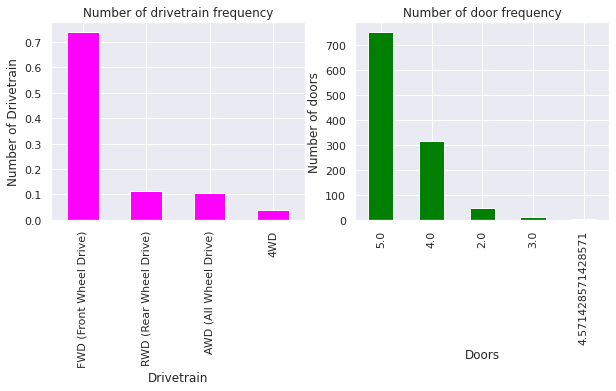

In [ ]:
#Histogram of drivetrain and door frequency shows that most of the cars has front wheel drive and 5 doors
plt.figure(1)
plt.subplot(221)
car['Drivetrain'].value_counts(normalize=True).plot(figsize=(10,8),kind="bar",color="magenta")
plt.title("Number of drivetrain frequency")
plt.ylabel("Number of Drivetrain")
plt.xlabel("Drivetrain")

plt.subplot(222)
car['Doors'].value_counts().plot(figsize=(10,8),kind="bar",color="green")
plt.title("Number of door frequency")
plt.ylabel("Number of doors")
plt.xlabel("Doors")

Text(0.5, 0, 'Type')

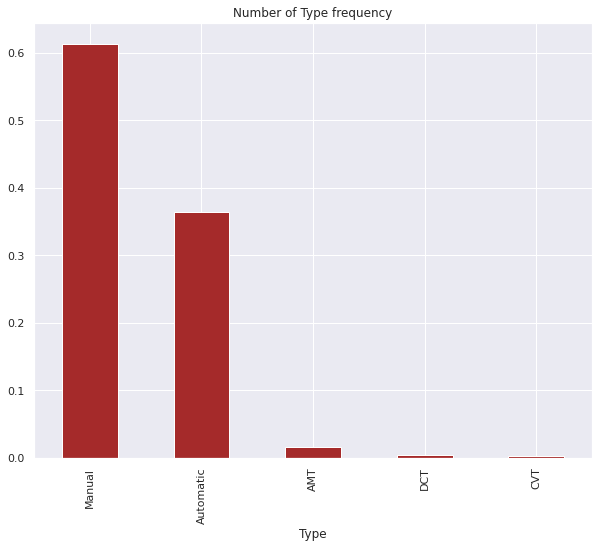

In [ ]:
# Histogram of type shows that most of the cars has manualm type gear
car['Type'].value_counts(normalize=True).plot(figsize=(10,8),kind="bar",color="Brown")
plt.title("Number of Type frequency")
plt.xlabel("Type")

Text(0.5, 0, 'Body style')

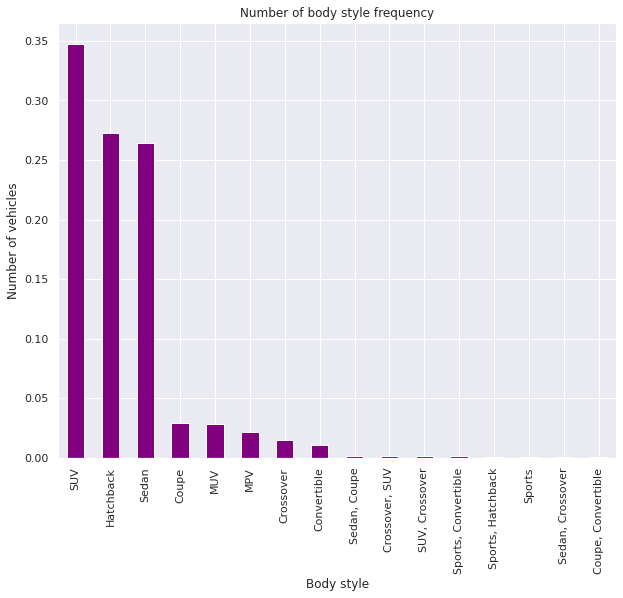

In [ ]:
#Histogram of body style frequency shows that most of the cars are of body style suv followed by hatchback and sedan
car['Body_Type'].value_counts(normalize=True).plot(figsize=(10,8),kind="bar",color="Purple")
plt.title("Number of body style frequency")
plt.ylabel("Number of vehicles")
plt.xlabel("Body style")

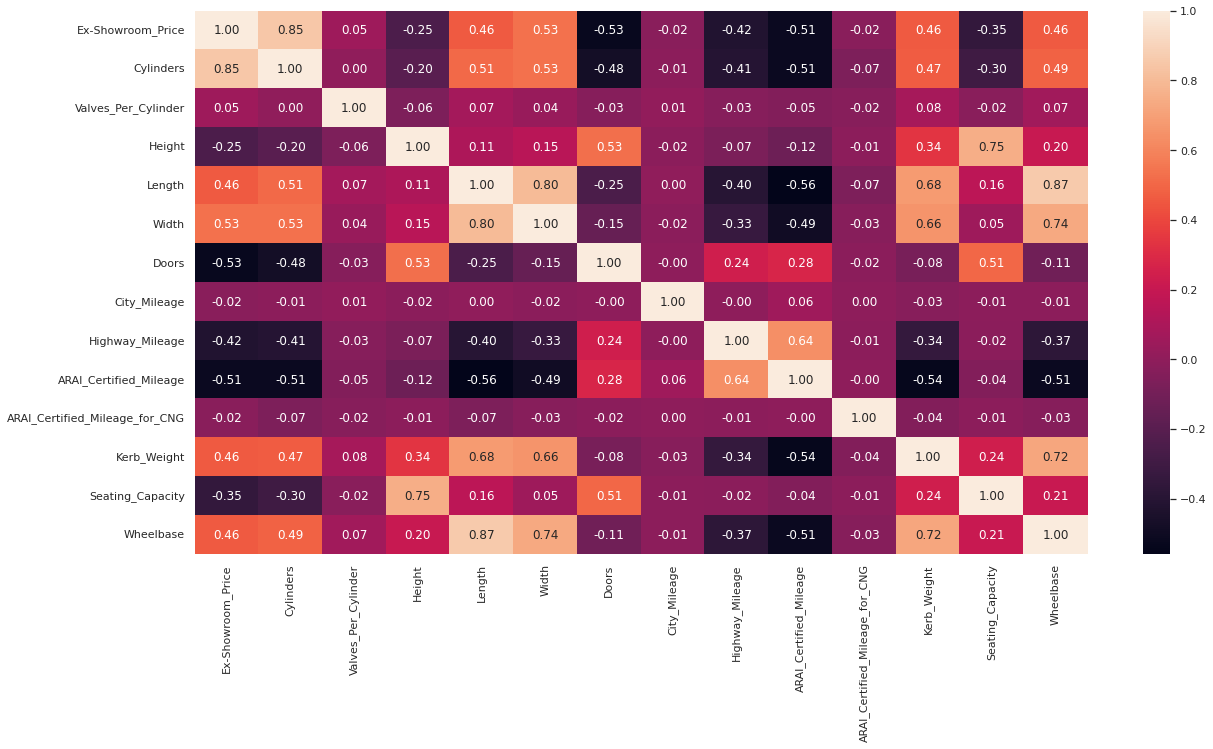

In [ ]:
# Making the heatmap shows that Kerb-weight is positively corelated and city-mileage and highway-mileage are negatively corelated.
corr = car.corr()
plt.figure(figsize=(20,10))
a = sns.heatmap(corr,annot=True,fmt='.2f')

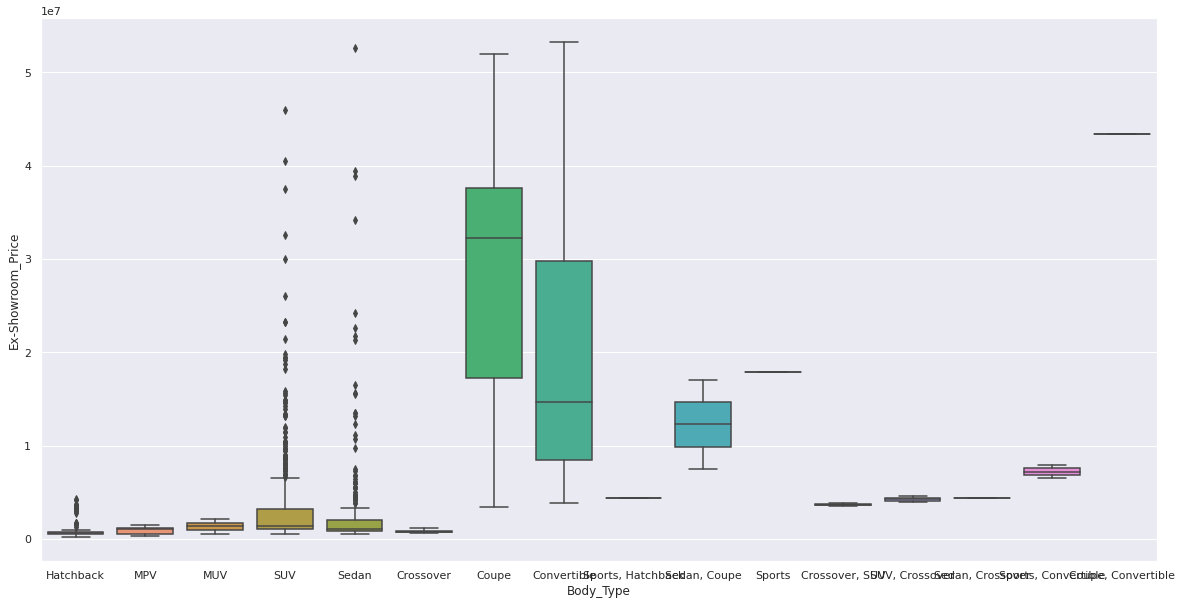

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(x="Body_Type", y="Ex-Showroom_Price",data=car)

**Findings : Coupe model are expensive in price followed by convertible**

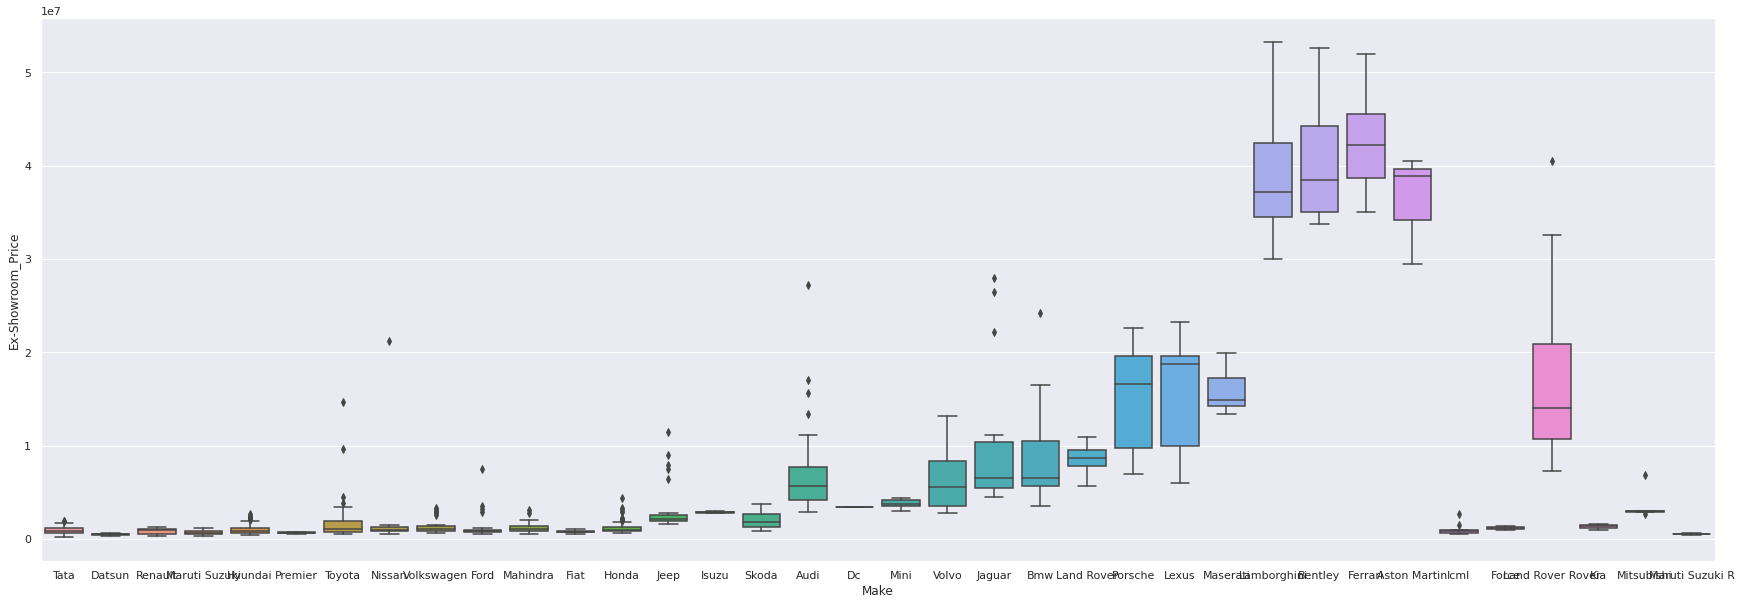

In [ ]:
plt.rcParams['figure.figsize']=(30,10)
ax = sns.boxplot(x="Make", y="Ex-Showroom_Price",data=car)

**Findings : Lamborghini Ferrari etc produces expensive cars whereas Tata, Datsun, Renault etc. produces budget models with lower prices**

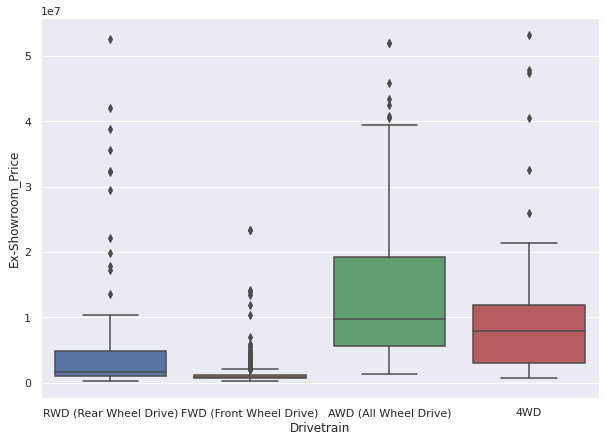

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Drivetrain", y="Ex-Showroom_Price",data=car)

**Findings: All wheel drive are expensive followed by 4WD and RWD**

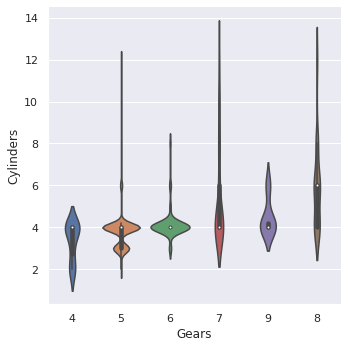

In [ ]:
sns.catplot(data=car,x="Gears",y="Cylinders",kind="violin")

**Findings: Vehicle with 13/14 cylinders have 7-8 gears**

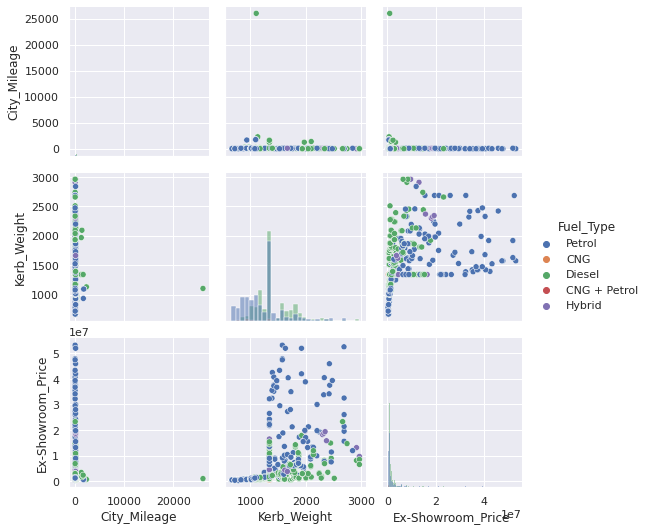

In [ ]:
g = sns.pairplot(car[["City_Mileage","Kerb_Weight","Drivetrain","Fuel_Type","Ex-Showroom_Price"]],hue="Fuel_Type", diag_kind="hist")

**Findings:
  1)Vehicle mileage decreases as kerb-weight increases.
  2)kerb-weight is positively corelated with price.**

# **Price Prediction Model**

In [ ]:
X= car[['Make', 'Model','Variant','Fuel_Type']]
Y= car['Ex-Showroom_Price']

In [ ]:
# size 0.2 means 20 out of 100% data is for testing and 80 is for training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['Make','Model','Variant','Fuel_Type']])

OneHotEncoder()

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make','Model','Variant','Fuel_Type']),remainder='passthrough')

In [ ]:
lr=LinearRegression()

In [ ]:
# Whenever we send raw data it will be transformed to predictions by using this pipe
pipe=make_pipeline(column_trans,lr)

In [ ]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Aston Martin', 'Audi', 'Bentley', 'Bmw', 'Datsun', 'Dc',
       'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Icml',
       'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
       'Land Rover Rover', 'Lexus', 'Mahindra', 'Maruti...
       'Z8', 'Zdi', 'Zdi Ags', 'Zdi Amt', 'Zdi Plus', 'Zdi+', 'Zdi+ Ags',
       'Zdi+ Dual', 'Zest Premio', 'Zeta 1.2', 'Zeta At', 'Zeta Mt',
       'Zlx', 'Zx Cvt', 'Zx Mt', 'Zxi', 'Zxi (O)', 'Zxi (Opt)', 'Zxi Ags',
       'Zxi Amt', 'Zxi At', 'Zxi Plus'], dtype=object),
                                                                            array(['CNG', 'CNG + Petrol', 'Diesel', 'Hybrid', 'Petrol'], dtype=object)]),
                                                  ['Make', 'Model'

In [ ]:
Y_pred= pipe.predict(X_test)

In [ ]:
Y_pred

array([  554947.84942473,  1154589.33232029,  7711499.73624711,
        1003342.44952935,  5740508.89287292,  1341096.24537139,
        9850547.73793571,   783094.20820288,   586379.77325538,
         738333.34602713,   733411.90388882,   622094.9407094 ,
        1028756.15298709,  1033180.16979158,  4849831.0744485 ,
        5758974.39052086,   684641.34557409,  1533999.93723208,
        7666499.88455434,  1444439.14740353,  6752307.75305333,
        1913992.61151397,  1203550.16714281,  1280182.73808857,
        2502208.90117312,   537581.49872971,  2310135.75145731,
       12910495.01392278,  1011682.15188588,  7062876.64822742,
        1099706.54799724,   978107.67836345,  5621200.41173671,
        4950065.98504586,   720907.70431878,  1913992.61151397,
         407545.60304111,   512722.20761609,   715620.19789669,
         613113.88036413,  1220829.3027029 ,  1019397.92821979,
        2145328.68681275,  1072788.70641772,   714239.13749753,
        2040333.17409153,   913749.94410

In [ ]:
# r2 score will give the accuracy of my model.
r2_score(Y_test,Y_pred)

0.93488712557143

In [ ]:
# We have noticed that there was a fluctuation in r2_score value and so we will randomly pass any state and we will choose the state where it will be highest
scores=[]
for i in range(1000):
  X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=i)
  lr=LinearRegression()
  pipe=make_pipeline(column_trans,lr)
  pipe.fit(X_train,Y_train)
  Y_pred= pipe.predict(X_test)
  scores.append(r2_score(Y_test,Y_pred))

In [ ]:
np.argmax(scores)

318

In [ ]:
scores[np.argmax(scores)]

0.9853929802454208

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,Y_train) 
Y_pred= pipe.predict(X_test)
r2_score(Y_test,Y_pred)

0.9853929802454208

In [ ]:
import pickle

In [ ]:
# Example of the model
pipe.predict(pd.DataFrame([['Datsun','Go','D','Petrol']],columns=['Make','Model','Variant','Fuel_Type']))

array([380254.33145014])

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Aston Martin', 'Audi', 'Bentley', 'Bmw', 'Datsun', 'Dc',
       'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Icml',
       'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
       'Land Rover Rover', 'Lexus', 'Mahindra', 'Maruti Suzuki',
       'Maruti Suzuki R', 'Maserati', 'Mini', 'Mitsubishi', 'Nissan',
       'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

In [ ]:
with open('LR_price_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(pipe, file)

In [ ]:
with open('LR_price_model.pkl', 'rb') as f:
  model = pickle.load(f)


In [ ]:
model.predict(pd.DataFrame([['Datsun','Go','D','Petrol']],columns=['Make','Model','Variant','Fuel_Type']))

array([380254.33145014])

# **Customer Segmentation**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas.util.testing as tn

In [ ]:
#We're converting the categorical values of make column into numerical values using labelencoder utility class. 
# This will replace original column in the dataframe
encodedOutput_y = LabelEncoder()
car['Make']= encodedOutput_y.fit_transform(car.iloc[:,1].values)

In [ ]:
car.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Seating_Capacity,Seats_Material,Type,Wheelbase
0,125,Nano Genx,Xt,292667,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS 4,...,23.600000,17.297346,23.600000,26.160526,660.0,4,4.0,Fabric,Manual,2230.0
1,125,Nano Genx,Xe,236447,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS 4,...,23.600000,17.297346,23.600000,26.160526,725.0,4,4.0,Fabric,Manual,2230.0
2,125,Nano Genx,Emax Xm,296661,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS 4,...,100.001156,17.297346,18.525887,36.000000,710.0,4,4.0,Fabric,Manual,2230.0
3,125,Nano Genx,Xta,334768,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS 4,...,23.600000,17.297346,21.900000,26.160526,725.0,5,4.0,Fabric,Automatic,2230.0
4,125,Nano Genx,Xm,272223,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS 4,...,23.600000,17.297346,23.600000,26.160526,725.0,4,4.0,Fabric,Manual,2230.0


In [ ]:
# We are locating values of particular column in Z
Z = car[['Ex-Showroom_Price','Make']].values

In [ ]:
print(Z)

[[ 292667     125]
 [ 236447     125]
 [ 296661     125]
 ...
 [1431000      44]
 [1201000      44]
 [6862560     121]]


**For choosing correct number of clusters we are doing elbow method**

In [ ]:
# wcss stands for within cluster sum of square it is sum of square distance between each point in centroid
from sklearn.cluster import KMeans
wcss=[]

In [ ]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(Z)
  wcss.append(kmeans.inertia_)

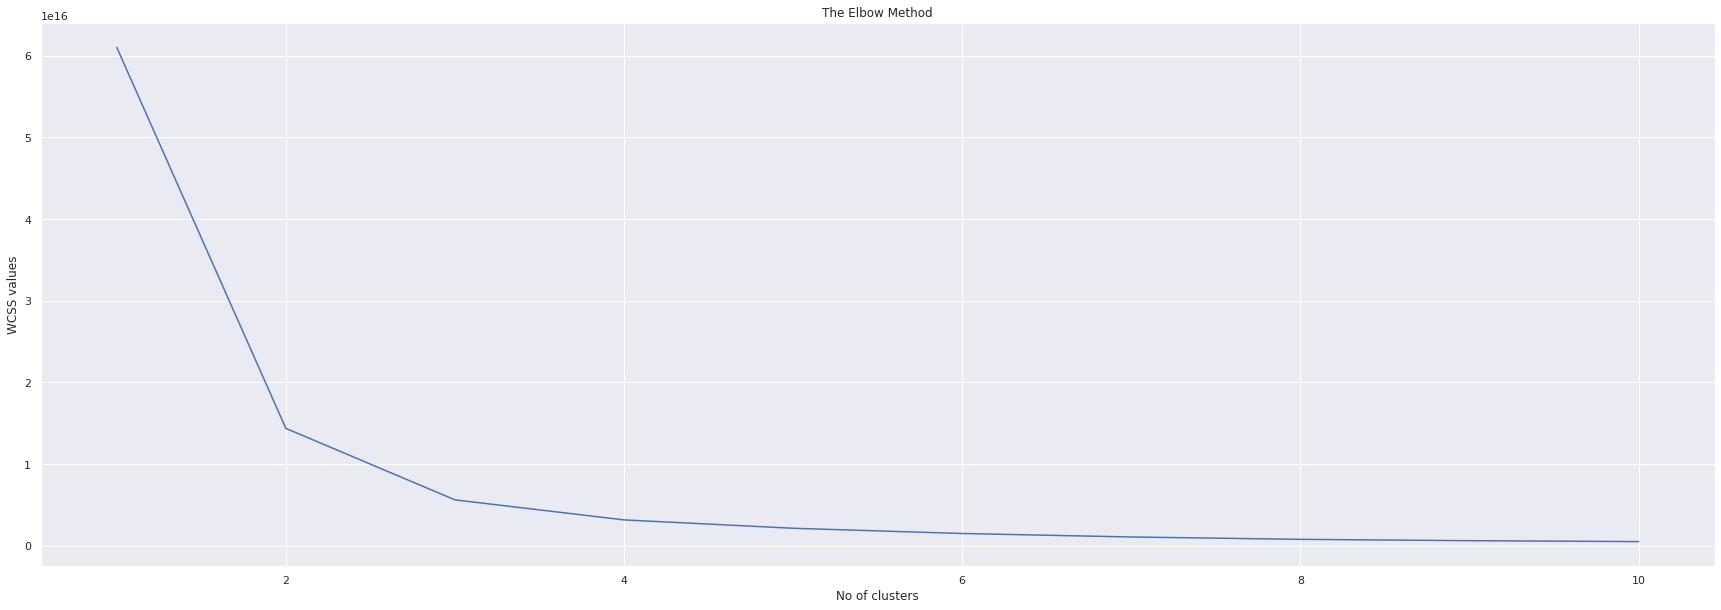

In [ ]:
# We will plot elbow graph so that we can find number of clusters 
# We can see that the graph drastically cganges from 1 to 2 and it straightens from 6 to 10. We can see that we are getting elbow at k = 3
# This means optimal number of clusters will be 3
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show()

In [ ]:
# Training the clustering model.
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [ ]:
# Return a label for each data point based on their cluster
Cluster_label = kmeans.fit_predict(Z)

In [ ]:
print(Cluster_label)

[0 0 0 ... 0 0 0]


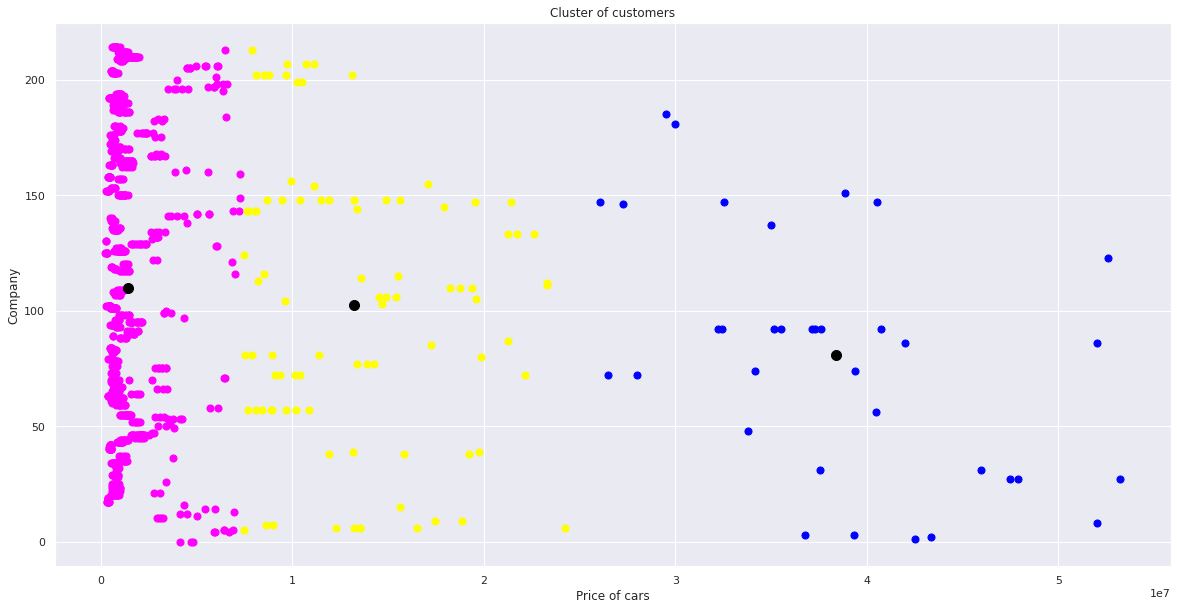

In [ ]:
# Visualizing all the clusters and their centroids
plt.figure(figsize=(20,10))
plt.scatter(Z[Cluster_label==0,0], Z[Cluster_label==0,1], s = 50, c = 'magenta', label = 'Customer1')
plt.scatter(Z[Cluster_label==1,0], Z[Cluster_label==1,1], s = 50, c = 'blue', label = 'Customer2')
plt.scatter(Z[Cluster_label==2,0], Z[Cluster_label==2,1], s = 50, c = 'Yellow', label = 'Customer3')
#plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'Black', label="Centroids")
plt.title('Cluster of customers')
plt.xlabel('Price of cars')
plt.ylabel('Company')

plt.show()

**We have got 3 clusters of customers**
**1) The magenta colour dots represents that major number of cars are of low budget and that is designed for people with low inome.Hence, it shows people which are having low income.**
**2) The yellow colour dots represents the number of cars which are having medium price range. They are designed for people with medium income. Hence, it shows people with medium budget**
**3) The blue colour dots shows cars with high price range. They are designed for people having high income.Hence, it shows people with high budget.**

# **Legal and Illegal Cars**

**So, the government of India has updated the emission norms. "As of now manufacturing and registration of BS6 vehicles has started, from April 2020 all BS6 manufacturing is mandatory, respectively. So,from April 2020, no BS 4 vehicle will be legally sold or registered in India."**

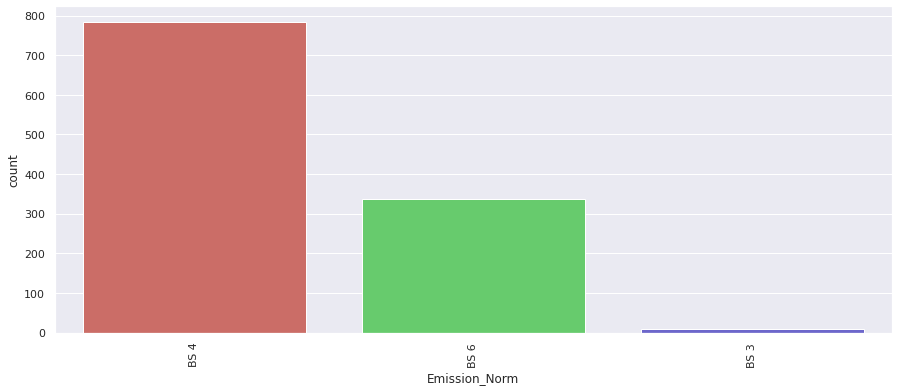

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Emission_Norm',data=car, palette='hls')
plt.xticks(rotation = 90)
plt.show()

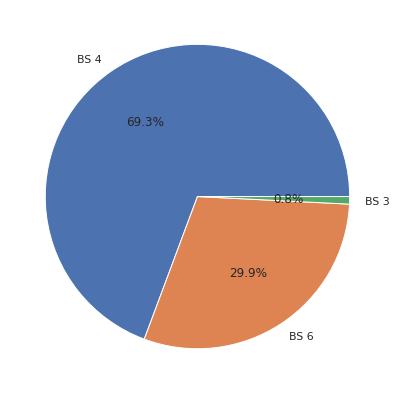

In [ ]:
# Making a pie chart
plt.figure(figsize=(7,7))
plt.pie((car['Emission_Norm'].value_counts()),labels=(car['Emission_Norm'].value_counts().keys()),autopct = '%0.1f%%')
plt.show()


In [ ]:
car['Emission_Norm'].value_counts()

BS 4    784
BS 6    338
BS 3      9
Name: Emission_Norm, dtype: int64

**According to above value counts there are 784 vehicles with BS 4 emission and 9 BS 3 emission. So, these vehicles will be considered illegal and hence, it's time for them to launch a new variant with BS 6 emission norm.**